In [2]:
#Cargamos los datos del dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('Cars93.csv')
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [3]:

# Observamos la cabecera del dataset

data.head(5)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
# Verificamos si existen celdas vacias
data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [5]:
#Seleccionamos algunas features y el objetivo

keys = ['Manufacturer', 'Model', 'Type', 'Min.Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make']
y = 'Price'

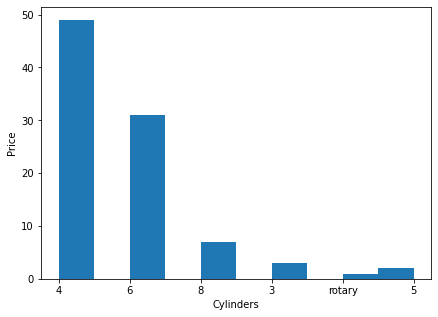

In [6]:

#Visualizando algunos datos
fig = plt.figure(figsize=(7,5))
plt.hist(data['Cylinders'])
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.show()

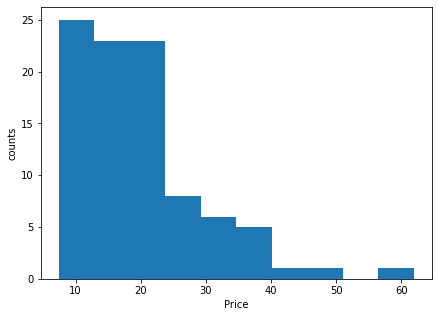

In [7]:
#Visualizando el objetivo
fig = plt.figure(figsize=(7,5))
plt.hist(data['Price'])
plt.xlabel('Price')
plt.ylabel('counts')
plt.show()

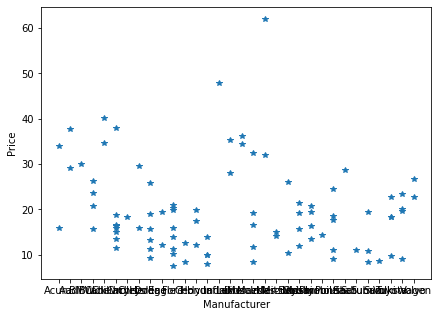

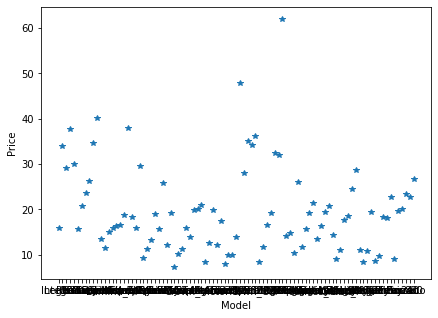

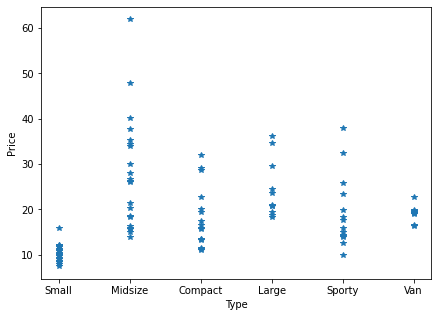

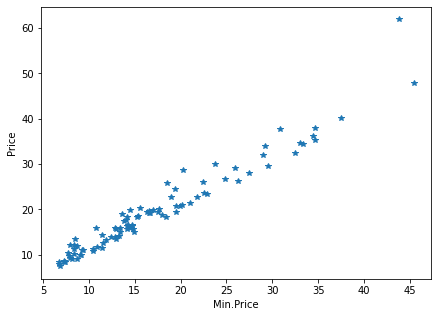

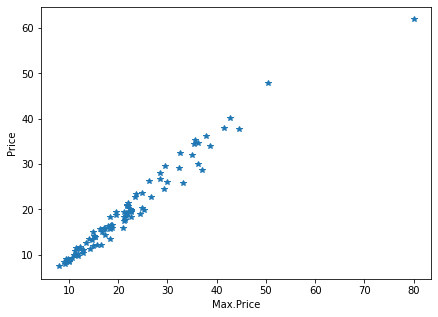

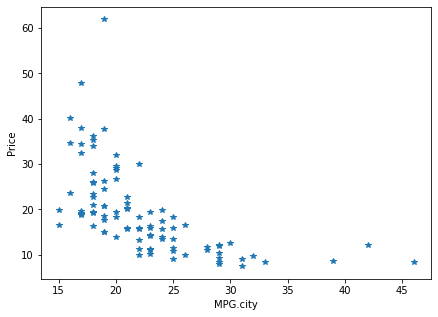

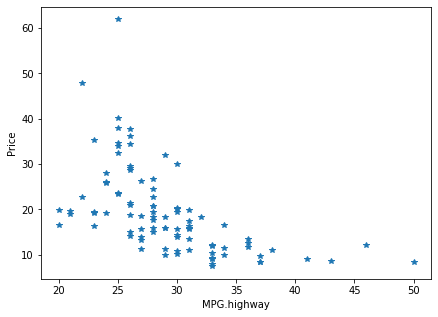

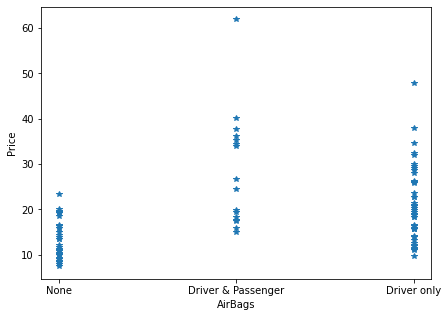

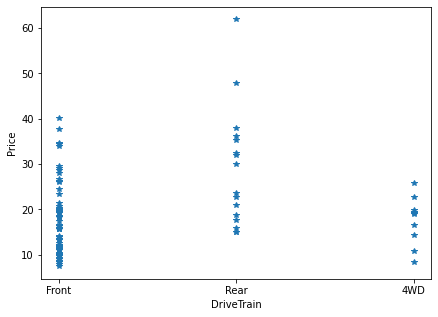

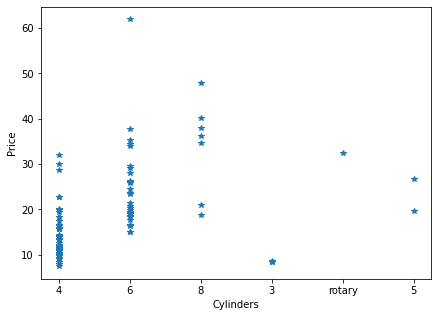

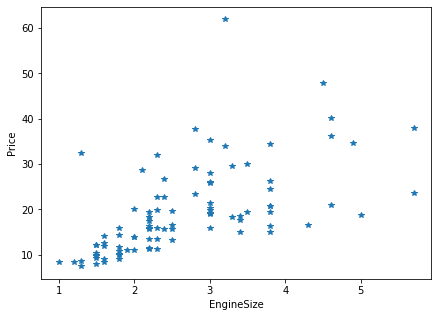

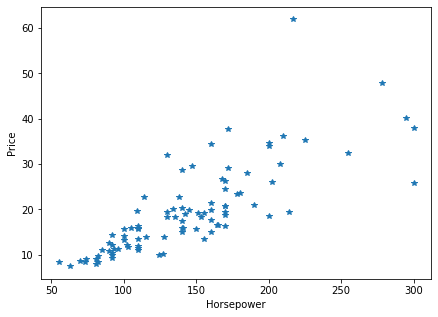

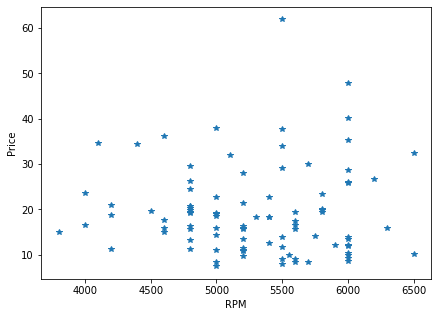

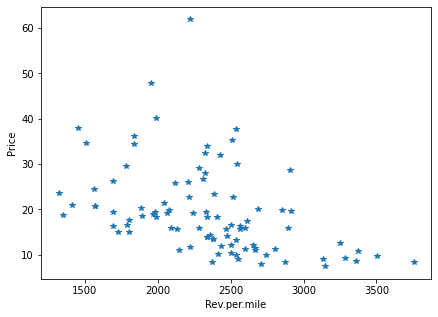

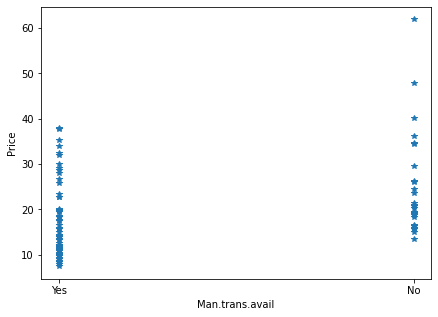

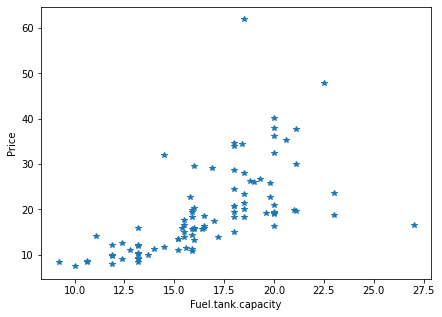

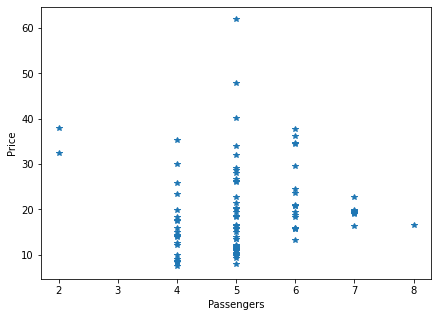

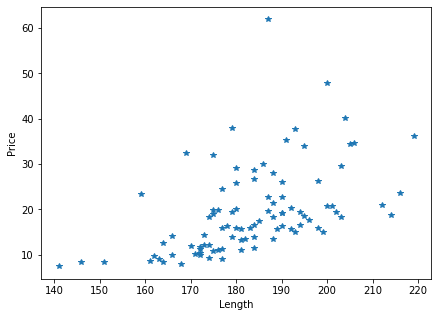

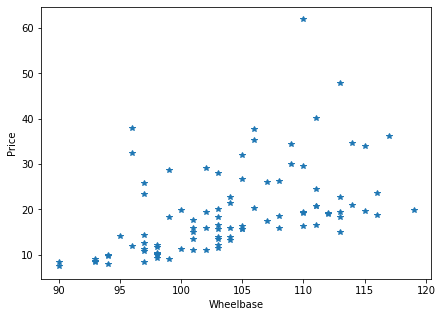

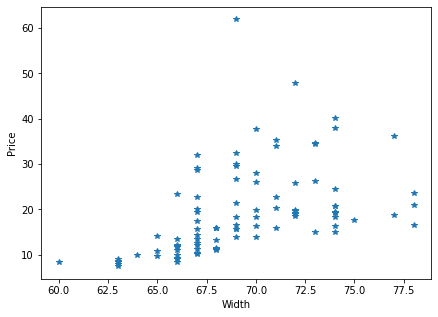

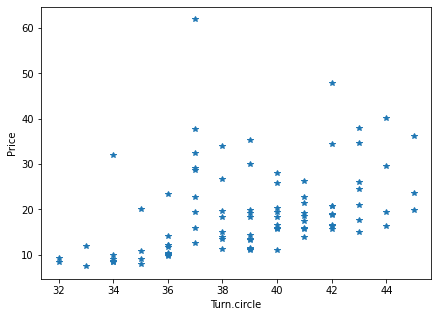

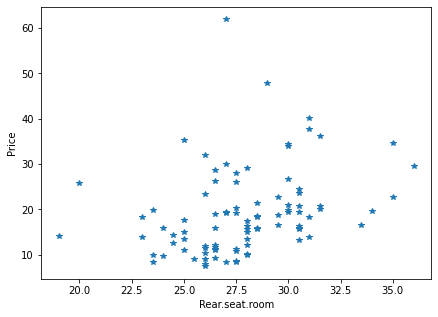

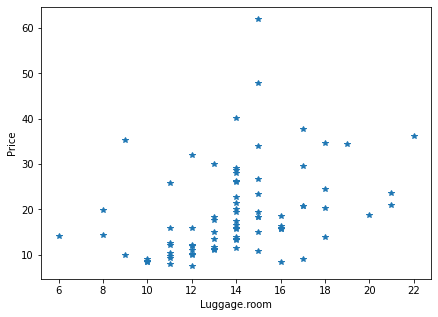

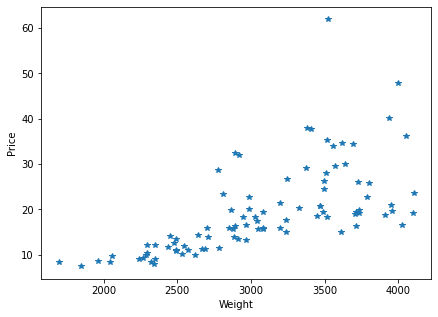

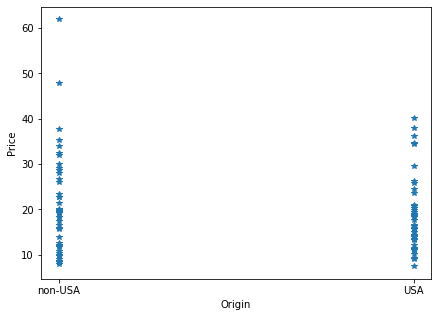

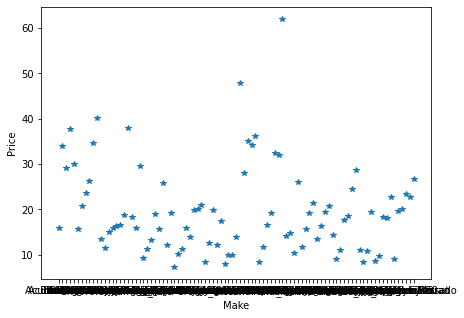

In [8]:
#Clasificación Visual
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],data[y],'*')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

In [9]:
#usar mascara para separar caros y baratos

Y = np.array(data[y], dtype=int)
np.unique(Y,return_counts=True)

Y[Y<(np.mean(data['Price']))] = 0
Y[Y>=(np.mean(data['Price']))] = 1

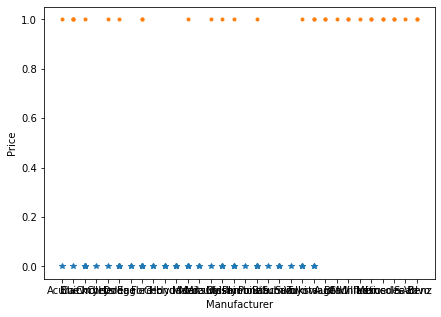

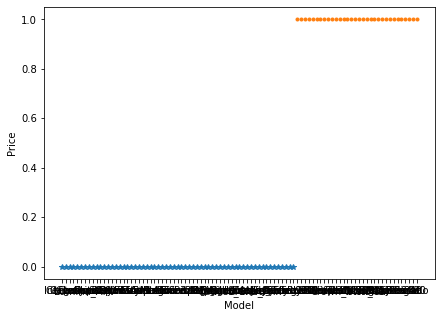

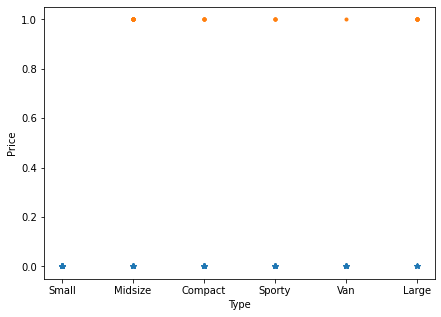

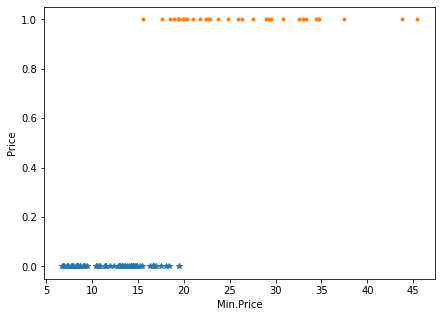

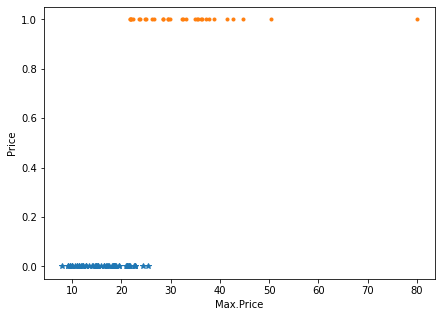

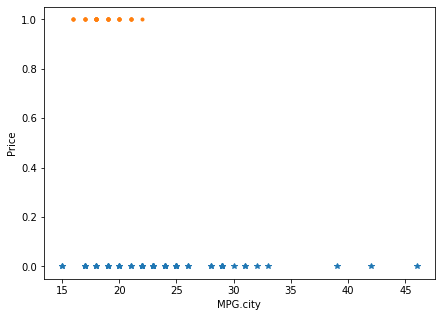

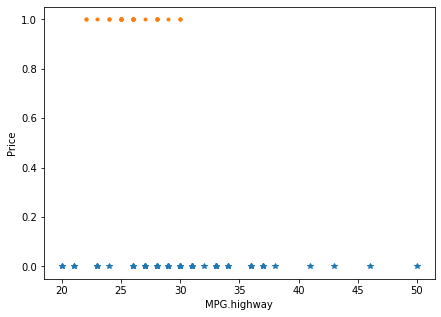

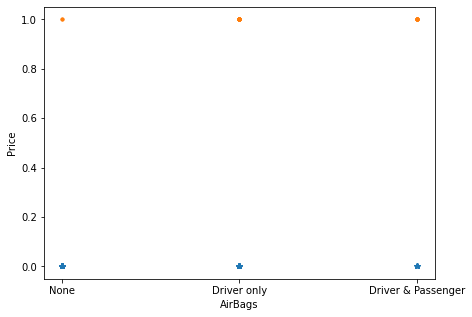

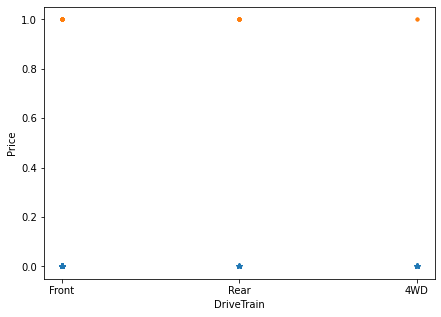

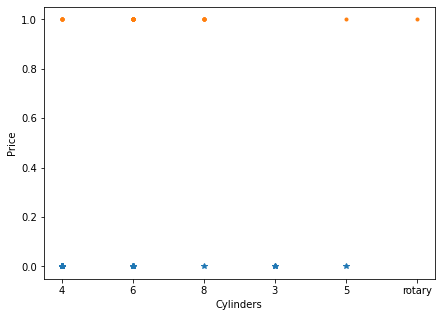

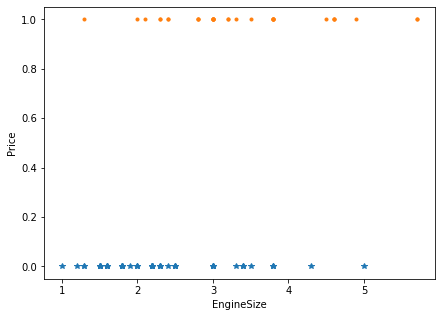

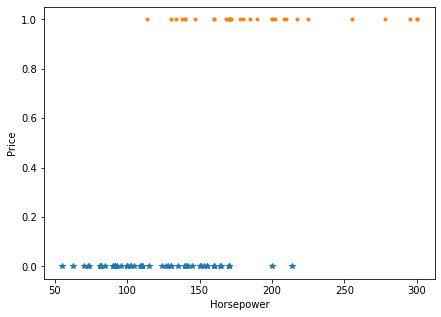

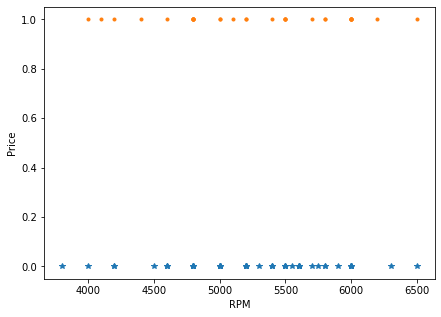

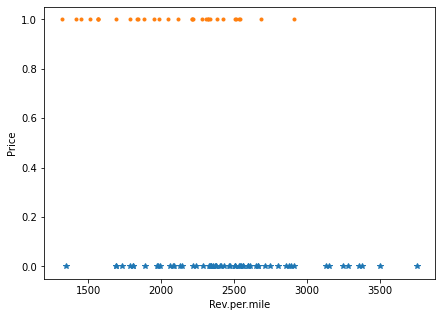

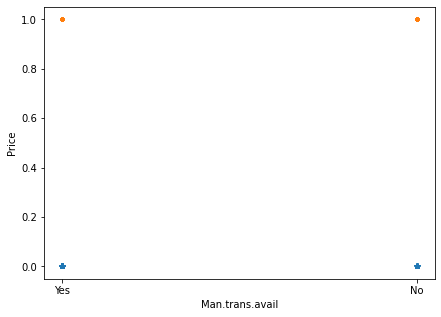

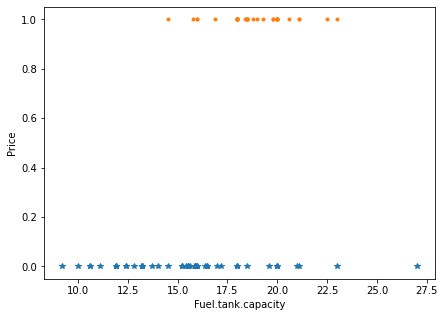

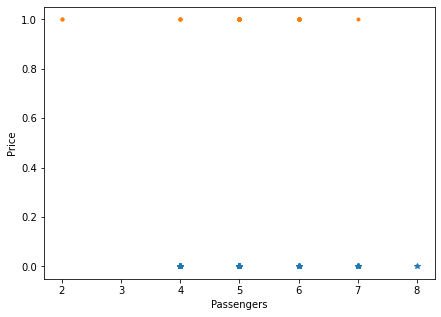

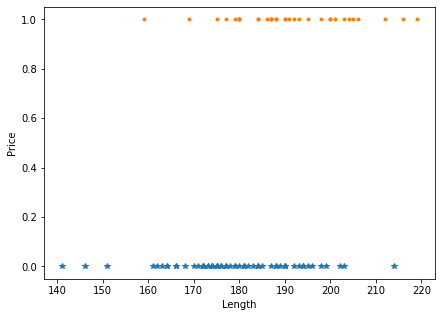

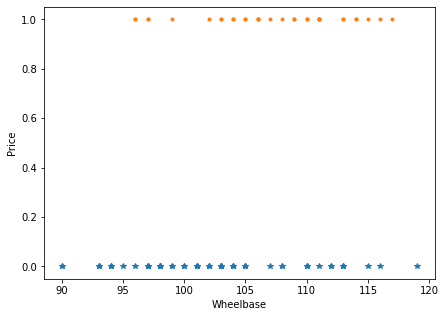

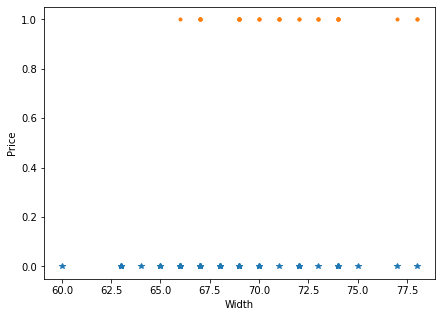

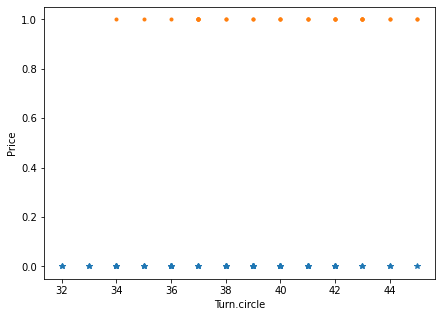

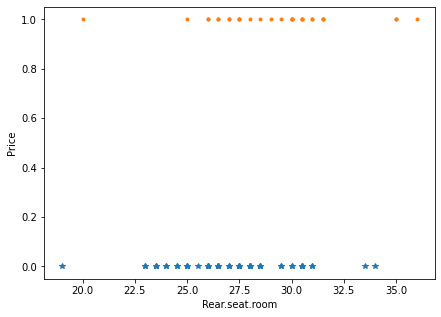

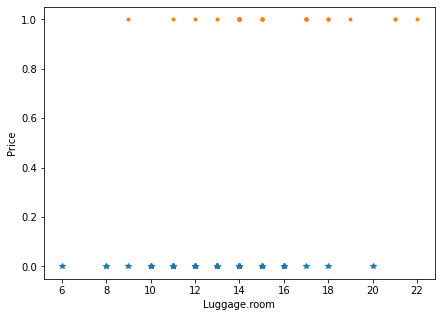

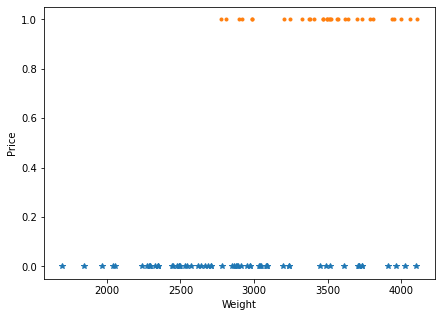

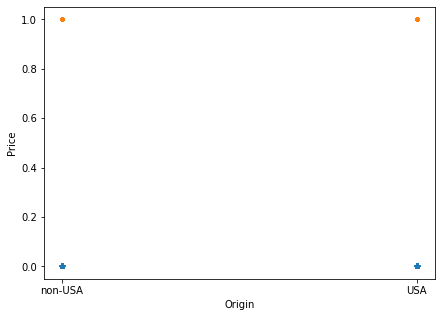

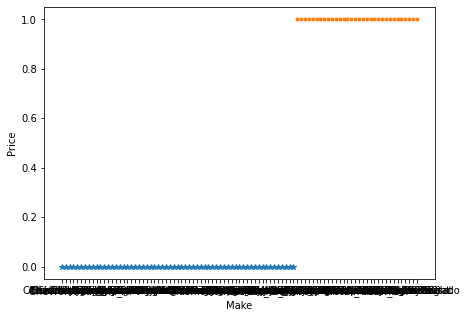

In [10]:
np.unique(Y,return_counts=True)

for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k][Y==0],Y[Y==0],'*')
  plt.plot(data[k][Y==1],Y[Y==1],'.')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

In [11]:
!pip install corner

In [12]:
#selesccion de keys utiles y a codificar (de categoricos a numericos)

keys_categoric=['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail','Origin', 'Make']
keys_categoric_codes=['Manufacturer_code', 'Model_code', 'Type_code', 'AirBags_code', 'DriveTrain_code',
       'Man.trans.avail_code','Origin_code', 'Make_code']

In [13]:
features=[]

for k in keys_categoric:
  categoric_clases=data[k].value_counts().index.tolist()
  features.append(categoric_clases)

In [15]:
#Codificamos los features categoricos

from sklearn.preprocessing import OrdinalEncoder

for i in range(len(keys_categoric)):

  # Creamos el codificador indicandole el orden de la variables
  encoder = OrdinalEncoder(categories=[features[i]])

  # Ajustamos el codificador con la variable correspondiente y la transformamos
  encoder.fit(data[[keys_categoric[i]]])
  data[keys_categoric_codes[i]] = encoder.transform(data[[keys_categoric[i]]])

In [17]:
#keys codificados que serán usados

keys_code_use = ['Manufacturer_code', 'Model_code', 'Min.Price',
       'Max.Price', 'MPG.city', 'MPG.highway','Make_code' ]

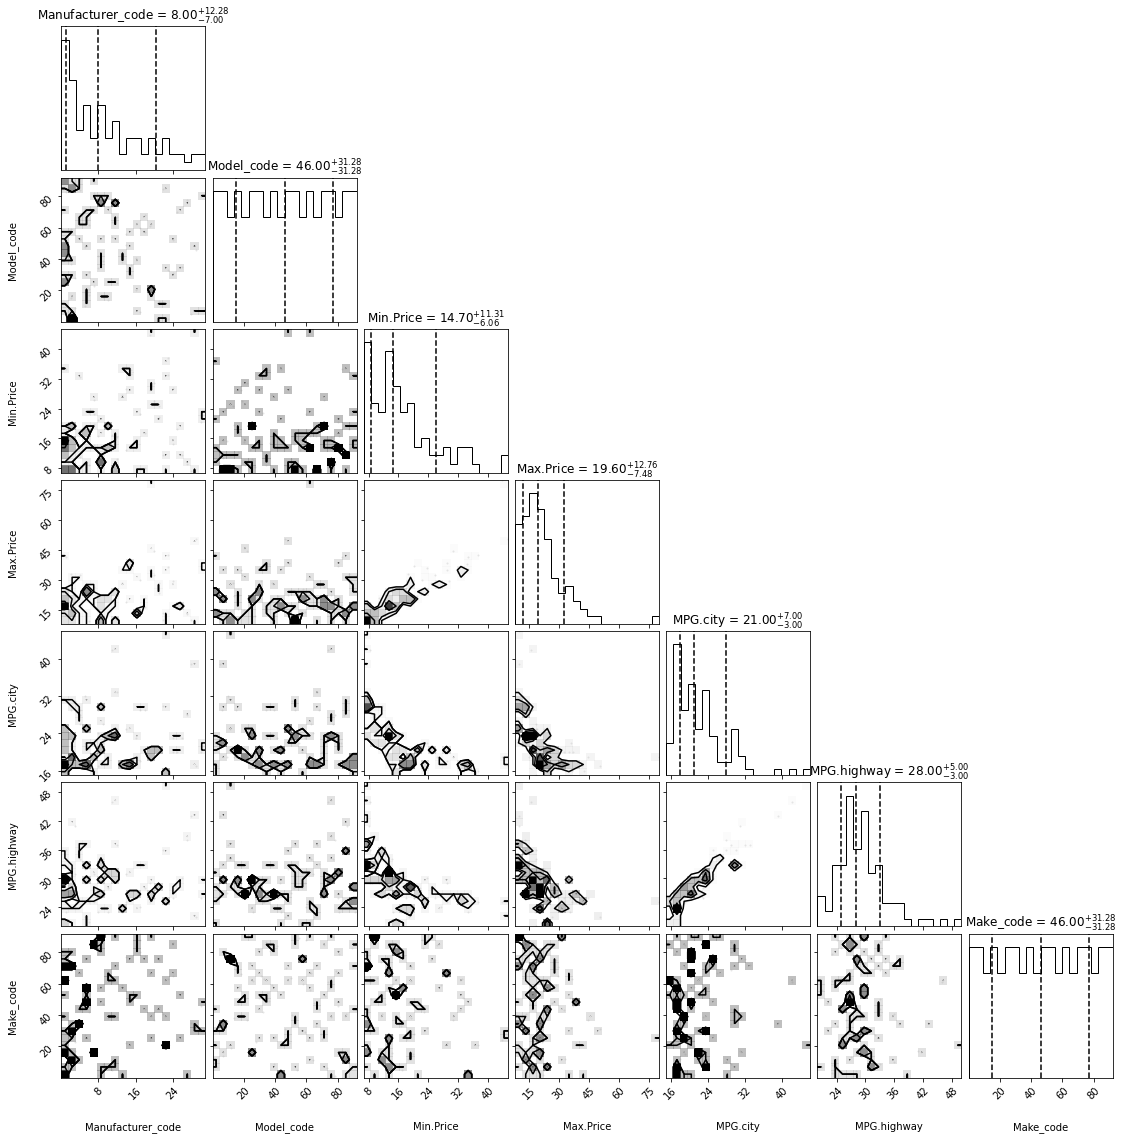

In [19]:
#corner para observar correlaciones

import corner

figure = corner.corner(data[keys_code_use], labels=keys_code_use,
                       quantiles=[0.16, 0.5, 0.84], show_titles=True, 
                       title_kwargs={"fontsize": 12})

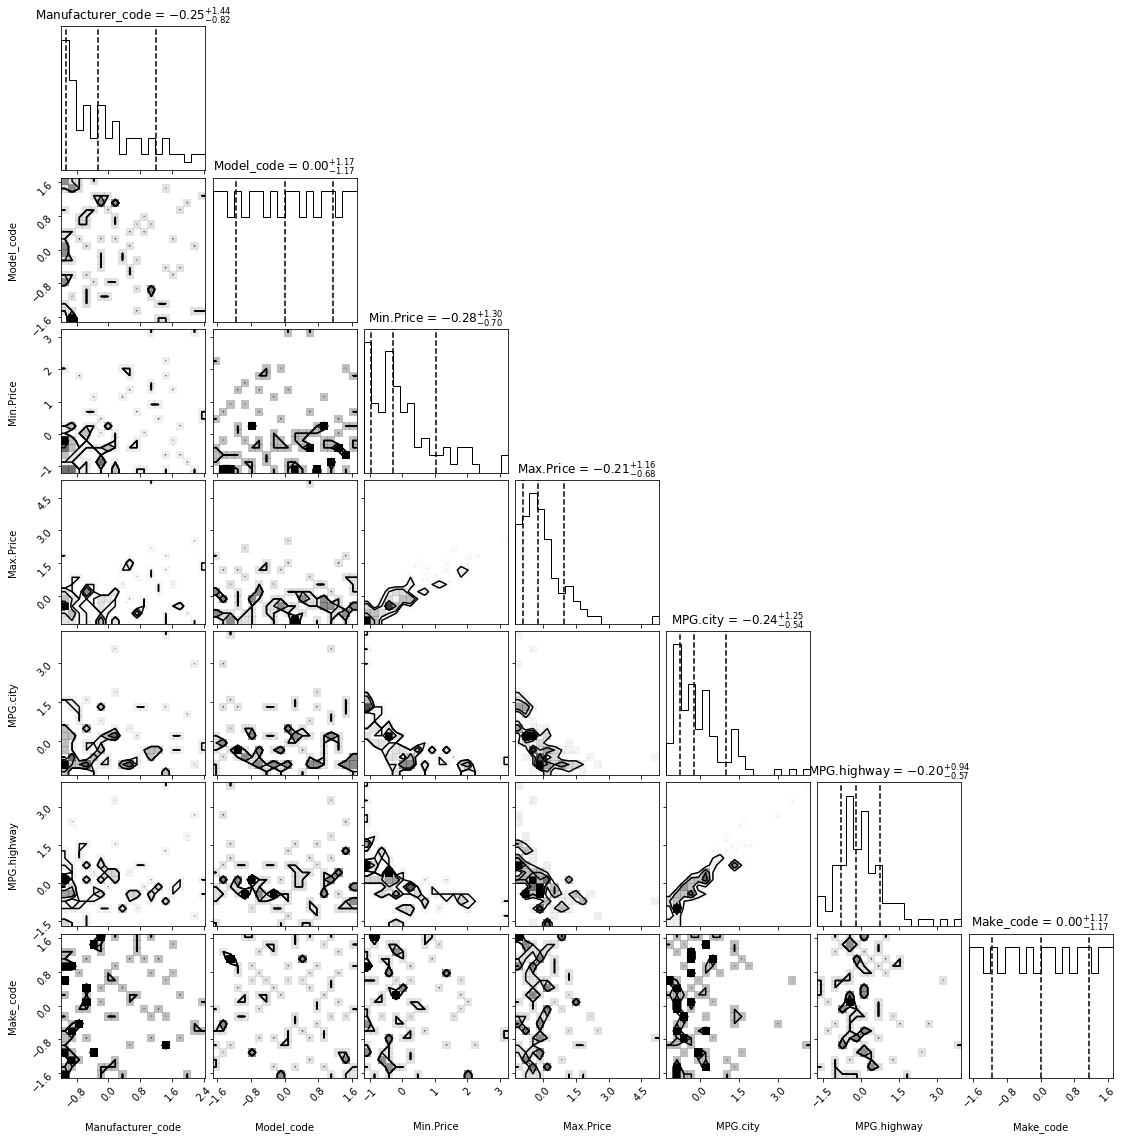

In [20]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data[keys_code_use])

import corner

figure = corner.corner(data_scaled, labels=keys_code_use,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})


In [21]:
#--- Cargamos el método para crear un modelo de Bosque Aleatorio

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
#--- Importamos algunos métodos de sklearn

from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100, max_depth=10)

X_train, X_test, Y_train, Y_test = train_test_split(np.array(data[keys_code_use]),Y)

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [29]:
#--- Calculamos la precisión
acc = sum(Y_pred == Y_test)/len(Y_test)
acc

0.9583333333333334

In [30]:
#--- Calculamos la importancia de los parametros
importances = model.feature_importances_
importances

array([0.0534258 , 0.03281292, 0.39068787, 0.30151942, 0.12812767,
       0.06232978, 0.03109654])

In [31]:
#--- Organizamos los parametros de menor a mayor
ii = np.argsort(importances)[::-1]
np.array(keys_code_use)[ii]

array(['Min.Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'Manufacturer_code', 'Model_code', 'Make_code'], dtype='<U17')

**El metodo sugiere que las variables mas importantes para conocer el precio de un carro son:**

-el precio mínimo que se encuentre en el mercado
-el precio máximo que se encuentre en el mercado 
-el MPG.city
-el MPG.highway
-Manufaturer
-Model
-Make

